# Principal Component Analysis(PCA)

In [11]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
imagelist=['amy1.png','amy2.png','andrew1.png','andrew2.png','andy1.png','andy2.png','erin1.png','erin2.png','gabe1.png','gabe2.png','hill2.png','hill4.png','jack1.png','jack2.png','zach1.png','zach2.png']

train_img=[]
for file in imagelist:
    first=np.array(imageio.imread('Train/'+file))
    m,n=first.shape
    first=np.reshape(first,(m*n,1))
    train_img.append(first)

print(m,n)
img_train=np.matrix(np.array(train_img))
print(img_train.shape)
train_img=np.transpose(img_train)

m,n=train_img.shape
print("train_img.shape=",m,n)
print(train_img)
print(img_train[0])

150 125
(16, 18750)
train_img.shape= 18750 16
[[ 13  28  53 ... 220 163 197]
 [ 20  34  67 ... 217 160 188]
 [ 27  39  53 ... 224 149 193]
 ...
 [174 107   6 ... 197 106  69]
 [126 220   5 ... 237 123  72]
 [128 254   6 ... 252 123  75]]
[[ 13  20  27 ... 174 126 128]]


### Calculating average face vector

In [12]:
avgface=np.ones((m,1))
for i in range(m):
    avgface[i]=np.mean(train_img[i])
print("The average face vector is",avgface)
print(avgface.shape)

The average face vector is [[136.5625]
 [141.625 ]
 [148.375 ]
 ...
 [ 90.0625]
 [ 94.1875]
 [ 98.8125]]
(18750, 1)


### Subtracting average face vector from all faces

In [13]:
for i in range(n):
    norm=np.transpose(train_img)-np.transpose(avgface)
print("img_train.shape=",norm)

img_train.shape= [[-123.5625 -121.625  -121.375  ...   83.9375   31.8125   29.1875]
 [-108.5625 -107.625  -109.375  ...   16.9375  125.8125  155.1875]
 [ -83.5625  -74.625   -95.375  ...  -84.0625  -89.1875  -92.8125]
 ...
 [  83.4375   75.375    75.625  ...  106.9375  142.8125  153.1875]
 [  26.4375   18.375     0.625  ...   15.9375   28.8125   24.1875]
 [  60.4375   46.375    44.625  ...  -21.0625  -22.1875  -23.8125]]


### Calculating covariance matrix and eigen values 

In [14]:
covmat=(norm*np.transpose(norm))

eigen,u=np.linalg.eig(covmat)
print("eigen values are",eigen)

eigen values are [2.43104565e+08 1.29941828e+08 1.08632307e+08 6.34314146e+07
 5.37859320e+07 3.83139683e+07 3.49437516e+07 2.23935683e+07
 1.27834337e-08 1.38220523e+07 3.31082771e+06 3.93407194e+06
 5.44422442e+06 7.41985729e+06 9.10018495e+06 8.82473729e+06]


### Determining value of k best faces

In [15]:
a,s,v=np.linalg.svd(covmat)

summation=np.sum(s)
print(summation)
for k in range(1,len(s)):
    sigma=0
    for i in range(0,k):
        sigma+=s[i]
    sigma=sigma/summation
    if(sigma>=0.95):
        print("selected value of k is",k)
        break

##selecting k eigen vectors from the set of 16 vectors
eigenvectors=np.empty((k,16))
for i in range(0,k):
    temp=np.empty((1,16))
    for j in range(0,16):
        temp[0,j]=u[i,j]
    eigenvectors[i]=temp


mappedeigenvectors=train_img*np.transpose(eigenvectors)
print(mappedeigenvectors.shape)

weightmatrix=np.transpose(mappedeigenvectors)*np.transpose(norm)
print(weightmatrix.shape)
#print(weightmatrix)

746403290.25
selected value of k is 10
(18750, 10)
(10, 16)


### Testing unknown face

Minimum Distance =  14635312.952842822
Face =  amy1.png


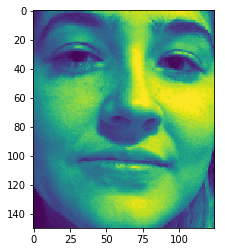

Minimum Distance =  15256053.488663487
Face =  andrew2.png


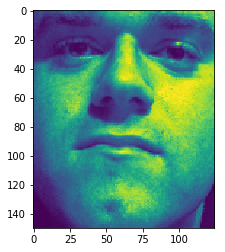

Minimum Distance =  27735595.79767933
Face =  andy2.png


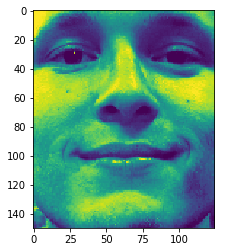

Minimum Distance =  11759380.498115318
Face =  erin2.png


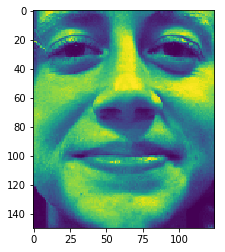

Minimum Distance =  21593356.38923768
Face =  gabe1.png


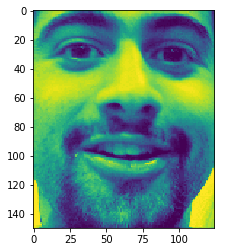

Minimum Distance =  20593088.912885513
Face =  hill2.png


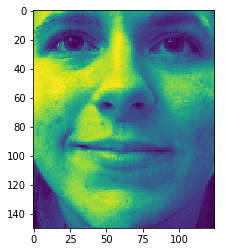

Minimum Distance =  28137750.810052097
Face =  jack2.png


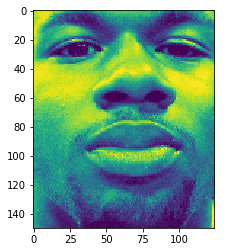

Minimum Distance =  14234864.947886718
Face =  zach2.png


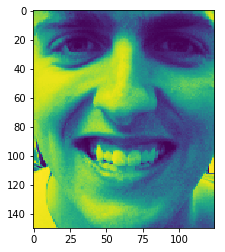

In [17]:
testimagelist=['amy3.png','andrew3.png','andy3.png','erin3.png','gabe3.png','hill3.png','jack3.png','zach3.png']
for file in testimagelist:
    image=imageio.imread('Test/'+file)
    m,n=image.shape
    image=np.reshape(image,(m*n,1))
    normalisedface=image-avgface
    testweight=np.transpose(mappedeigenvectors)*normalisedface

    transposeweightmatrix=np.transpose(weightmatrix)
    m,n=transposeweightmatrix.shape
    flag=0
    store=[]
    for i in range(0,m):
        difference=transposeweightmatrix[i]-np.transpose(testweight)
        totaldiff=np.sum(np.power(difference,2))
        totaldiff=np.sqrt(totaldiff)
        store.append(totaldiff)
        if(totaldiff <= min(store)):
            pos = i


    a=min(store)

    print("Minimum Distance = ",a)
    print("Face = ",imagelist[pos])
    y='Train/'+imagelist[pos]
    x = imageio.imread(y)
    plt.imshow(x)
    plt.show()